# Exercises: Chapter 5

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [18]:
%matplotlib inline

Create the following visualizations using what you have learned up to this point in this book. Use the data from this chapter's `data/directory`:

#### **1. Plot the rolling 20-day minimum of the Facebook closing price using pandas.**

In [13]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb.head(3)

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896


<AxesSubplot: title={'center': '20 Day Rolling Minimum Price'}, xlabel='date'>

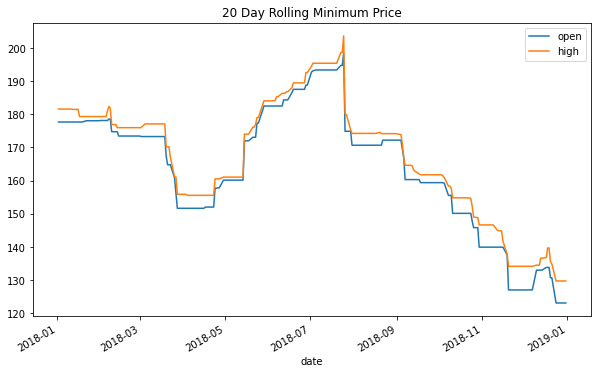

In [23]:

(fb.loc[:, ['open', 'high']]
 .rolling('20D')
 .min()
 .plot(figsize=(10,6),
      title = "20 Day Rolling Minimum Price")
)

<AxesSubplot: xlabel='date'>

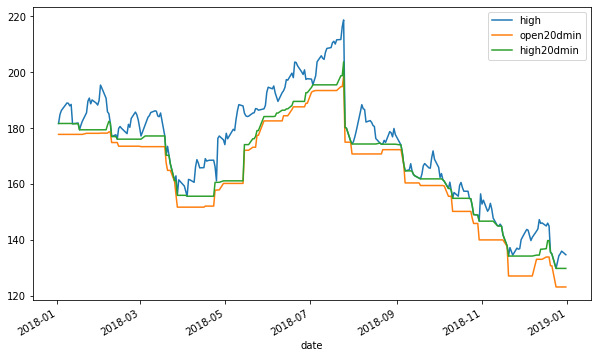

In [26]:
# me, added 'high' to the plot not rolling to see if rolling values made sense.
# they seem to
(fb.loc[:, ['open', 'high']]
 .assign(
     open20dmin = lambda x: x.open.rolling('20D').min(),
     high20dmin = lambda x: x.high.rolling('20D').min())
 .drop(columns='open')
 .plot(figsize=(10,6))
 )

#### **2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.**

Text(0.5, 0, 'Daily Change ($) from Open to Close')

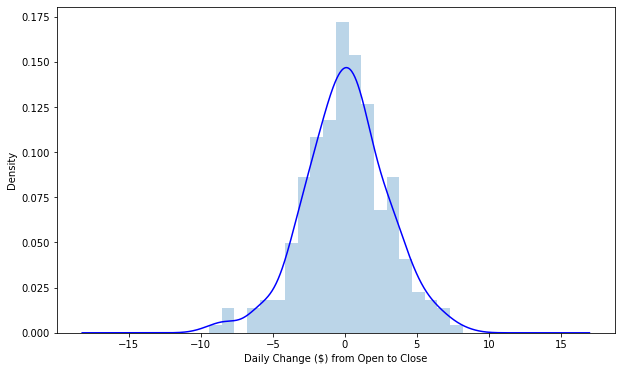

In [58]:
fb_chg=\
(fb
 .assign(chg = lambda x: x.close - x.open)
 .loc[:, ['chg']]
)

# histogram of chg
ax = fb_chg.chg.plot(figsize=(10,6), kind='hist', alpha=0.3, density=True, bins=20)

# kernel density plotted over histogram, using ax=ax to use the histogram assigned to ax in prior step
fb_chg.chg.plot(ax=ax, kind='kde',color='blue')
plt.xlabel('Daily Change ($) from Open to Close')


#### **3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.**

In [103]:
eq = pd.read_csv('data/earthquakes.csv')
eq.head(3)

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California


##### The `time` column initially confused me. The first 10 digits are the number of seconds since 1/1/1970 midnight in UTC. It's probably the most common way of representing time data that we covered above.    

##### The 13 digit representation was initially confusing. It turns out that the first 10 digits are as before and the final 3 digits are in thousandths of a second (microseconds). The parameter required to be passed to `to_datetime` for this 13 digit representation is `unit="ms"`.

In [105]:
(eq
 .assign(time = lambda x: pd.to_datetime(x.time, unit='ms')) # convert time object to datetime
 .set_index('time')
).head(3)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-10-13 23:59:28.010,1.35,ml,"9km NE of Aguanga, CA",0,California
2018-10-13 23:58:49.610,1.29,ml,"9km NE of Aguanga, CA",0,California
2018-10-13 23:57:42.610,3.42,ml,"8km NE of Aguanga, CA",0,California


With that datetime detour out of the way, I'll plot the boxplots.

Text(0, 0.5, 'Magnitude')

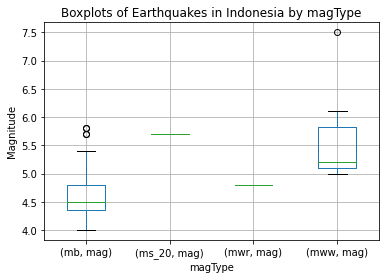

In [106]:
(eq
 .assign(time = lambda x: pd.to_datetime(x.time, unit='ms')) # convert time object to datetime
 .set_index('time')
 .sort_index()
 .query('parsed_place == "Indonesia"')
 .loc[:, ['magType', 'mag']]
 .groupby('magType')
 .boxplot(subplots=False) # I GUESS THE DEFAULT BEHAVIOR FOR PLOTTING GROUPBYS IS TO PLOT EACH
                          # ON A SEPARATE PLOT. SO `subplots=False` SEEMS TO BE REQUIRED TO PLOT
                          # THEM ON THE SAME CHART
)

plt.title("Boxplots of Earthquakes in Indonesia by magType")
plt.xlabel("magType")
plt.ylabel("Magnitude")

#### **4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.**

<AxesSubplot: title={'center': 'FB: Weekly High Price - Weekly Low Price'}, xlabel='date', ylabel='Price'>

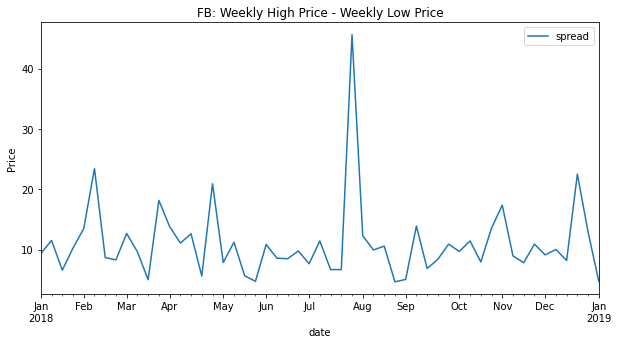

In [123]:
(
    fb
    .resample('1W')
    .agg({'high':'max', 'low':'min'})
    .assign(spread = lambda x: x.high.sub(x.low))[['spread']]
    .plot(title="FB: Weekly High Price - Weekly Low Price",
          ylabel="Price",
          figsize=(10,5)
         )
    
)

#### **5. Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA:**

>##### **a.  First, use the `diff()` method that was introduced in the Working with time series data section of Chapter 4, Aggregating Pandas DataFrames, to calculate the day-over-day change in new cases. Then, use `rolling()` to calculate the 14-day moving average.**



In [130]:
c19 = pd.read_csv('data/covid19_cases.csv', index_col= 'dateRep', parse_dates=True, dayfirst=True)
c19.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


In [132]:
#c19.info()

<AxesSubplot: xlabel='dateRep'>

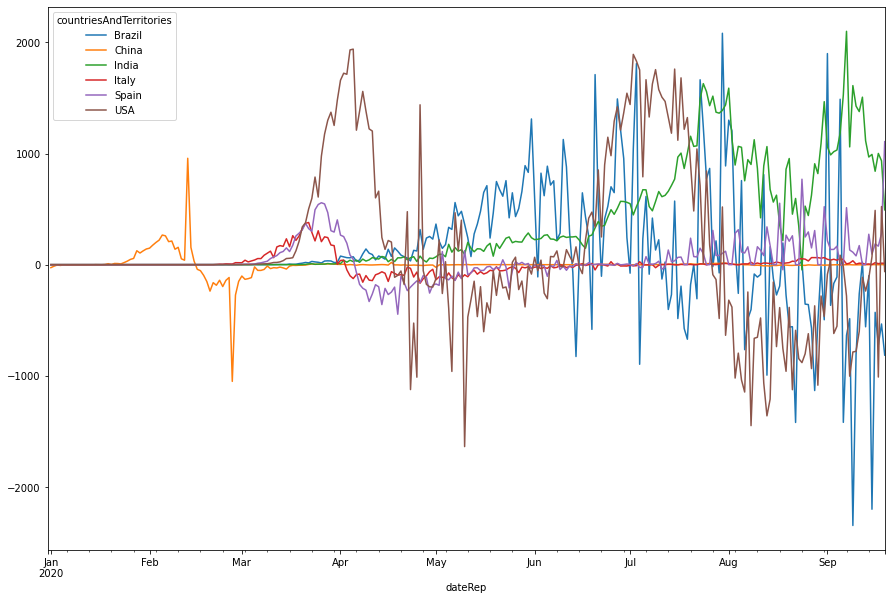

In [164]:
countries = ['Brazil', 'China', 'India', 'Italy', 'Spain', 'USA']

(
    c19
    .replace({'United_States_of_America' : "USA"})
    .pivot_table(index='dateRep', columns = 'countriesAndTerritories', values = 'cases')
    .loc[:, countries]
    .sort_index()
    .diff()
    .rolling('14d').mean()
    .plot(figsize=(15,10))

)

>##### **b) Make three subplots: one for China; one for Spain and Italy; and one for Brazil, India, and the USA.** 



In [165]:
c19_pivot =\
(c19
 .replace({'United_States_of_America' : "USA"})
 .pivot_table(index='dateRep', columns = 'countriesAndTerritories', values = 'cases')
 .loc[:, countries]
 .sort_index()
 .diff()
 .rolling('14d')
 .mean()
)

#### Matplotlib w/pandas, at least, won't let you pass multiple linewidths (e.g. linewith=[1.0, 2.0, 3.0]
#### Have to do this iteratively, one line at a time

Something like this might address it: https://stackoverflow.com/questions/14178194/python-pandas-plotting-options-for-multiple-lines

<AxesSubplot: xlabel='dateRep'>

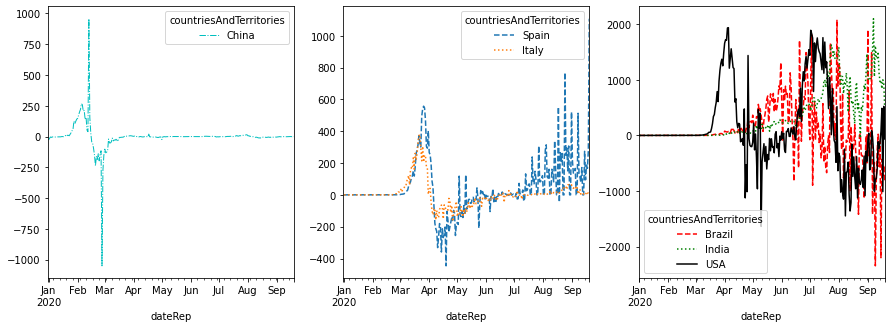

In [236]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

(c19_pivot[['China']]
 .plot(ax=axes[0], style='-.c', linewidth=1.0)
)

(
    c19_pivot[['Spain', 'Italy']]
    .plot(ax=axes[1], style=['--', ':'])
)

(
    c19_pivot[['Brazil', 'India', 'USA']]
    .plot(ax=axes[2], style=['r--', 'g:','k-'])
)

#### **6. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock prices:**  

>##### **a) The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Working with time series data section of Chapter 4, Aggregating Pandas DataFrames, for an easy way to do this).** 

In [237]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


<AxesSubplot: title={'center': 'Daily Pre-Market Change in FB Stock Price'}, xlabel='date'>

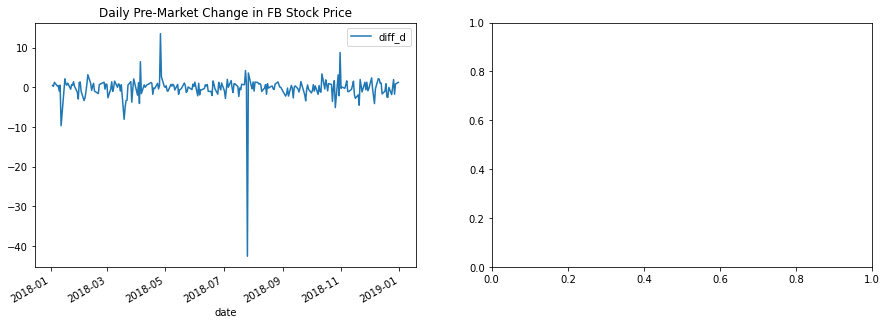

In [266]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

fb2=\
(
    fb
    .assign(diff_d = lambda x: x.open - x.close.shift(1))
    .loc[:, ['diff_d']]
)

fb2.plot(ax=axes[0], title = "Daily Pre-Market Change in FB Stock Price")

In [263]:
fb2.head()

,diff_d
date,
2018-01-02,NaN
2018-01-03,0.46
2018-01-04,0.23
2018-01-05,1.26
2018-01-08,0.35


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan-18'),
  Text(1, 0, 'Feb-18'),
  Text(2, 0, 'Mar-18'),
  Text(3, 0, 'Apr-18'),
  Text(4, 0, 'May-18'),
  Text(5, 0, 'Jun-18'),
  Text(6, 0, 'Jul-18'),
  Text(7, 0, 'Aug-18'),
  Text(8, 0, 'Sep-18'),
  Text(9, 0, 'Oct-18'),
  Text(10, 0, 'Nov-18'),
  Text(11, 0, 'Dec-18')])

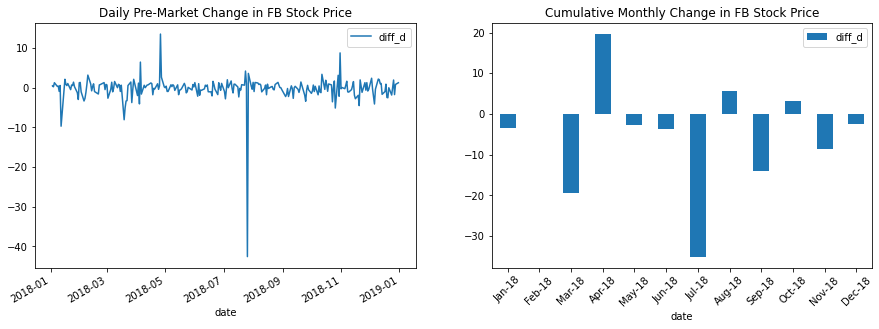

In [285]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, axes = plt.subplots(1, 2, figsize=(15,5))

fb2.plot(ax=axes[0], title = "Daily Pre-Market Change in FB Stock Price")

fb3=\
(
    fb2
    .resample('1M')
    .sum()
)

fb3.index = fb3.index.strftime('%b-%y')
fb3.plot(kind='bar', ax=axes[1], title="Cumulative Monthly Change in FB Stock Price")

plt.xticks(rotation=45)


>##### **c) Bonus #1: Color the bars according to whether there are gains in the stock price (green) or drops in the stock price (red).**


In [302]:
(fb3.diff_d > 0).map({True: 'g',False: 'r'}).values

array(['r', 'g', 'r', 'g', 'r', 'r', 'r', 'g', 'r', 'g', 'r', 'r'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan-18'),
  Text(1, 0, 'Feb-18'),
  Text(2, 0, 'Mar-18'),
  Text(3, 0, 'Apr-18'),
  Text(4, 0, 'May-18'),
  Text(5, 0, 'Jun-18'),
  Text(6, 0, 'Jul-18'),
  Text(7, 0, 'Aug-18'),
  Text(8, 0, 'Sep-18'),
  Text(9, 0, 'Oct-18'),
  Text(10, 0, 'Nov-18'),
  Text(11, 0, 'Dec-18')])

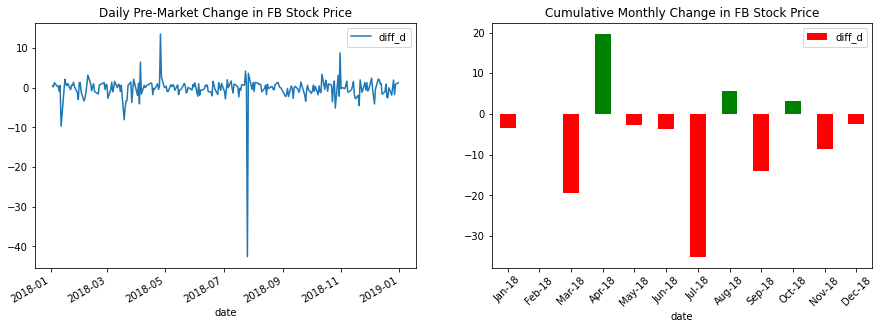

In [299]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, axes = plt.subplots(1, 2, figsize=(15,5))

fb2.plot(ax=axes[0], title = "Daily Pre-Market Change in FB Stock Price")

fb3=\
(
    fb2
    .resample('1M')
    .sum()
)

fb3.index = fb3.index.strftime('%b-%y')


axes[1] =fb3.plot(y=0, kind='bar', ax=axes[1],\
                  title="Cumulative Monthly Change in FB Stock Price", \
                  color=['r', 'g', 'r', 'g', 'r', 'r', 'r', 'g', 'r', 'g', 'r', 'r']) ### <<<< LOOK HERE


plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan-18'),
  Text(1, 0, 'Feb-18'),
  Text(2, 0, 'Mar-18'),
  Text(3, 0, 'Apr-18'),
  Text(4, 0, 'May-18'),
  Text(5, 0, 'Jun-18'),
  Text(6, 0, 'Jul-18'),
  Text(7, 0, 'Aug-18'),
  Text(8, 0, 'Sep-18'),
  Text(9, 0, 'Oct-18'),
  Text(10, 0, 'Nov-18'),
  Text(11, 0, 'Dec-18')])

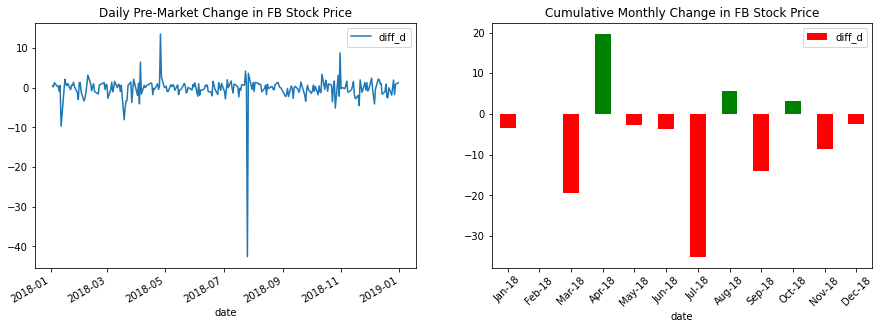

In [301]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, axes = plt.subplots(1, 2, figsize=(15,5))

fb2.plot(ax=axes[0], title = "Daily Pre-Market Change in FB Stock Price")

fb3=\
(
    fb2
    .resample('1M')
    .sum()
)

fb3.index = fb3.index.strftime('%b-%y')


axes[1] =fb3.plot(y=0, kind='bar', ax=axes[1],\
                  title="Cumulative Monthly Change in FB Stock Price", \
                  color=(fb3.diff_d > 0).map({True: 'g',False: 'r'})) ### <<<< LOOK HERE


plt.xticks(rotation=45)

>##### **d) Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.**

##### SEE ABOVE